In [1]:
!pip install gensim
!pip install sastrawi
!pip install google-play-scraper
!pip freeze
!pip freeze > requirements.txt
import nltk
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
import csv
import requests
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from collections import Counter
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from google.colab import files
from google_play_scraper import app, reviews, Sort, reviews_all
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("punkt_tab")

absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.10.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.15
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.16.5
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.10.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.1
arrow==1.3.0
arviz==0.22.0
astropy==7.1.0
astropy-iers-data==0.2025.9.1.0.42.11
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
Authlib==1.6.3
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.21.0
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.18.0
bigquery-magics==0.10.3
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.7.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.8.3
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.3
chex==0.1.90
clar

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Loading Dataset

In [2]:
uploaded = files.upload()

Saving ulasan_aplikasi.csv to ulasan_aplikasi (1).csv


In [3]:
app_reviews_df = pd.read_csv("ulasan_aplikasi.csv")

jumlah_ulasan, jumlah_kolom = app_reviews_df.shape
print("Jumlah ulasan:", jumlah_ulasan)
print("Jumlah kolom:", jumlah_kolom)

Jumlah ulasan: 55895
Jumlah kolom: 11


In [4]:
app_reviews_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,48f820c9-87e9-48f9-a768-0885d170ab8a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aku kasih bintang lima Karna aplikasi ini eman...,5,2,1.4.3,2025-09-11 02:42:19,NaN,NaN,1.4.3
1,ea9c341d-1ea4-4bcb-85ab-426c801f7178,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kalau mau masuk lemotnya minta ampun, 1 jam cu...",1,5,1.4.3,2025-09-10 10:09:57,"Hai Kak Muhammad Husain, maaf buat kendalanya ...",2025-09-10 10:12:06,1.4.3
2,8074980a-f92a-4cab-b966-f2de069c97d6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kecewa berat sama aplikasi ini, sudah akhir-ak...",1,23,1.4.2,2025-09-01 06:26:16,"Hai Kak Kamiso Miran, maaf atas kendalanya ya....",2025-09-01 09:07:48,1.4.2
3,43b0739b-299d-4d62-8c6d-a93378472e0a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya tidak menyangka bakalan minus saldonya, k...",1,45,1.4.2,2025-08-22 23:52:09,"Hai Kak Ya Ye, maaf untuk kendalanya ya Kak. S...",2025-08-23 03:16:16,1.4.2
4,9025e918-0f66-4794-b9e1-fae47f31248f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong di bagian verifikasi wajah untuk diperm...,1,36,1.4.2,2025-08-17 06:00:38,"Hai Kak Subaer, maaf utk kendalanya. Pastiin :...",2025-08-17 06:02:17,1.4.2
...,...,...,...,...,...,...,...,...,...,...,...
55890,1e680e59-785c-4d26-a13e-faf2469c25b3,budi hamzah,https://play-lh.googleusercontent.com/a/ACg8oc...,ok..,5,0,NaN,2025-06-02 03:45:29,NaN,NaN,NaN
55891,3eb60c12-0356-45ae-91b8-0745c3ed204b,yogo untoro,https://play-lh.googleusercontent.com/a-/ALV-U...,Terbaik.....,5,0,NaN,2025-09-08 00:06:22,NaN,NaN,NaN
55892,619935b5-8dcc-4c71-940c-1d7da348f4f3,Putra Nugraha,https://play-lh.googleusercontent.com/a-/ALV-U...,Mantappppp..... 👍👍👍👍👍,5,0,NaN,2025-01-25 14:47:28,"Hai Kak Putra Nugraha, terima kasih atas keper...",2025-01-25 14:56:43,NaN
55893,63beafac-7415-4fee-8ceb-e0e373472895,Armen Memen,https://play-lh.googleusercontent.com/a-/ALV-U...,Ok ..,5,0,NaN,2025-01-01 01:16:21,"Hi Mr/Ms Armen Memen, thank you for the positi...",2025-01-01 01:31:41,NaN


In [5]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55895 entries, 0 to 55894
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              55895 non-null  object
 1   userName              55895 non-null  object
 2   userImage             55895 non-null  object
 3   content               55895 non-null  object
 4   score                 55895 non-null  int64 
 5   thumbsUpCount         55895 non-null  int64 
 6   reviewCreatedVersion  50225 non-null  object
 7   at                    55895 non-null  object
 8   replyContent          25384 non-null  object
 9   repliedAt             25384 non-null  object
 10  appVersion            50225 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.7+ MB


In [6]:
clean_df = app_reviews_df.dropna()

In [7]:
clean_df = clean_df.drop_duplicates()

jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

Preprocessing Text

In [8]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [9]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [10]:
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [11]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
1,ea9c341d-1ea4-4bcb-85ab-426c801f7178,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kalau mau masuk lemotnya minta ampun, 1 jam cu...",1,5,1.4.3,2025-09-10 10:09:57,"Hai Kak Muhammad Husain, maaf buat kendalanya ...",2025-09-10 10:12:06,1.4.3,kalau mau masuk lemotnya minta ampun jam cuma...,kalau mau masuk lemotnya minta ampun jam cuma...,kalau mau masuk lemotnya minta ampun jam cuman...,"[kalau, mau, masuk, lemotnya, minta, ampun, ja...","[masuk, lemotnya, ampun, jam, cuman, logo, doa...",masuk lemotnya ampun jam cuman logo doang jari...
2,8074980a-f92a-4cab-b966-f2de069c97d6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kecewa berat sama aplikasi ini, sudah akhir-ak...",1,23,1.4.2,2025-09-01 06:26:16,"Hai Kak Kamiso Miran, maaf atas kendalanya ya....",2025-09-01 09:07:48,1.4.2,kecewa berat sama aplikasi ini sudah akhirakhi...,kecewa berat sama aplikasi ini sudah akhirakhi...,kecewa berat sama aplikasi ini sudah akhirakhi...,"[kecewa, berat, sama, aplikasi, ini, sudah, ak...","[kecewa, berat, aplikasi, akhirakhir, lemot, p...",kecewa berat aplikasi akhirakhir lemot pembaya...
3,43b0739b-299d-4d62-8c6d-a93378472e0a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya tidak menyangka bakalan minus saldonya, k...",1,45,1.4.2,2025-08-22 23:52:09,"Hai Kak Ya Ye, maaf untuk kendalanya ya Kak. S...",2025-08-23 03:16:16,1.4.2,Saya tidak menyangka bakalan minus saldonya ka...,saya tidak menyangka bakalan minus saldonya ka...,saya tidak menyangka bakalan minus saldonya ka...,"[saya, tidak, menyangka, bakalan, minus, saldo...","[menyangka, minus, saldonya, lupa, buka, aplik...",menyangka minus saldonya lupa buka aplikasi br...
4,9025e918-0f66-4794-b9e1-fae47f31248f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong di bagian verifikasi wajah untuk diperm...,1,36,1.4.2,2025-08-17 06:00:38,"Hai Kak Subaer, maaf utk kendalanya. Pastiin :...",2025-08-17 06:02:17,1.4.2,Tolong di bagian verifikasi wajah untuk diperm...,tolong di bagian verifikasi wajah untuk diperm...,tolong di bagian verifikasi wajah untuk diperm...,"[tolong, di, bagian, verifikasi, wajah, untuk,...","[tolong, verifikasi, wajah, dipermudah, stuck,...",tolong verifikasi wajah dipermudah stuck verif...
5,ac02efb2-6542-40aa-830b-df0e9b60ff8e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Makin hari makin lemot ini wondr, lama banget ...",1,168,1.4.1,2025-07-09 07:17:34,"Halo Kak Ruli, maaf buat gak nyaman dan terima...",2025-07-09 07:29:58,1.4.1,Makin hari makin lemot ini wondr lama banget g...,makin hari makin lemot ini wondr lama banget g...,makin hari makin lemot ini wondr lama banget g...,"[makin, hari, makin, lemot, ini, wondr, lama, ...","[lemot, wondr, banget, android, ios, buka, apl...",lemot wondr banget android ios buka aplikasi u...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53981,592650ca-18c0-45fa-95e9-500fb34c38a1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍,5,0,1.0.1,2024-07-12 11:04:17,"Hai Kak Ryan Yk, terima kasih atas review dan ...",2024-07-12 11:40:22,1.0.1,,,,[],[],
53985,f17047cb-de24-46fe-8d9c-de0b03d8f0d1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍👍👍👍,5,0,1.0.1,2024-08-09 18:52:37,"Hai Kak Muhammad Zikru Nanda, terima kasih bua...",2024-08-09 23:17:24,1.0.1,,,,[],[],
53991,de6c5b9f-6f9b-4e27-9e73-e0353acc9454,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍,5,0,1.0.1,2024-07-16 16:11:14,"Hai Kak Muchlis Abd. Mubin Mulis, terima kasih...",2024-07-16 23:27:51,1.0.1,,,,[],[],
53995,d308494e-7d81-445d-955e-1d07caef2e8a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jelek😏😏😏😏😏😏😏😏😏,1,0,1.0.1,2025-01-23 03:46:22,"Halo Kak Robi Inden, maaf sek

Pelabelan

In [12]:
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

lexicon_neutral = dict()

all_words = []
for text in clean_df['text_akhir']:
    tokens = re.findall(r'\w+', str(text).lower())
    all_words.extend(tokens)

counter = Counter(all_words)

for word in counter.keys():
    if word not in lexicon_positive and word not in lexicon_negative:
        lexicon_neutral[word] = 1

In [13]:
def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [14]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    10008
positive     7548
neutral      3935
Name: count, dtype: int64


Eksplorasi Label

Data Splitting dan Ekstraksi Fitur dengan TF-IDF

In [15]:
X = clean_df['text_akhir']
y = clean_df['polarity']

tfidf = TfidfVectorizer(max_features=30000, min_df=3, max_df=0.9, ngram_range=(1,3))
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=45)


Modeling


In [17]:
random_forest = RandomForestClassifier(
    class_weight='balanced',
    random_state=45
)

random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9989363823705378
Random Forest - accuracy_test: 0.8622828784119106


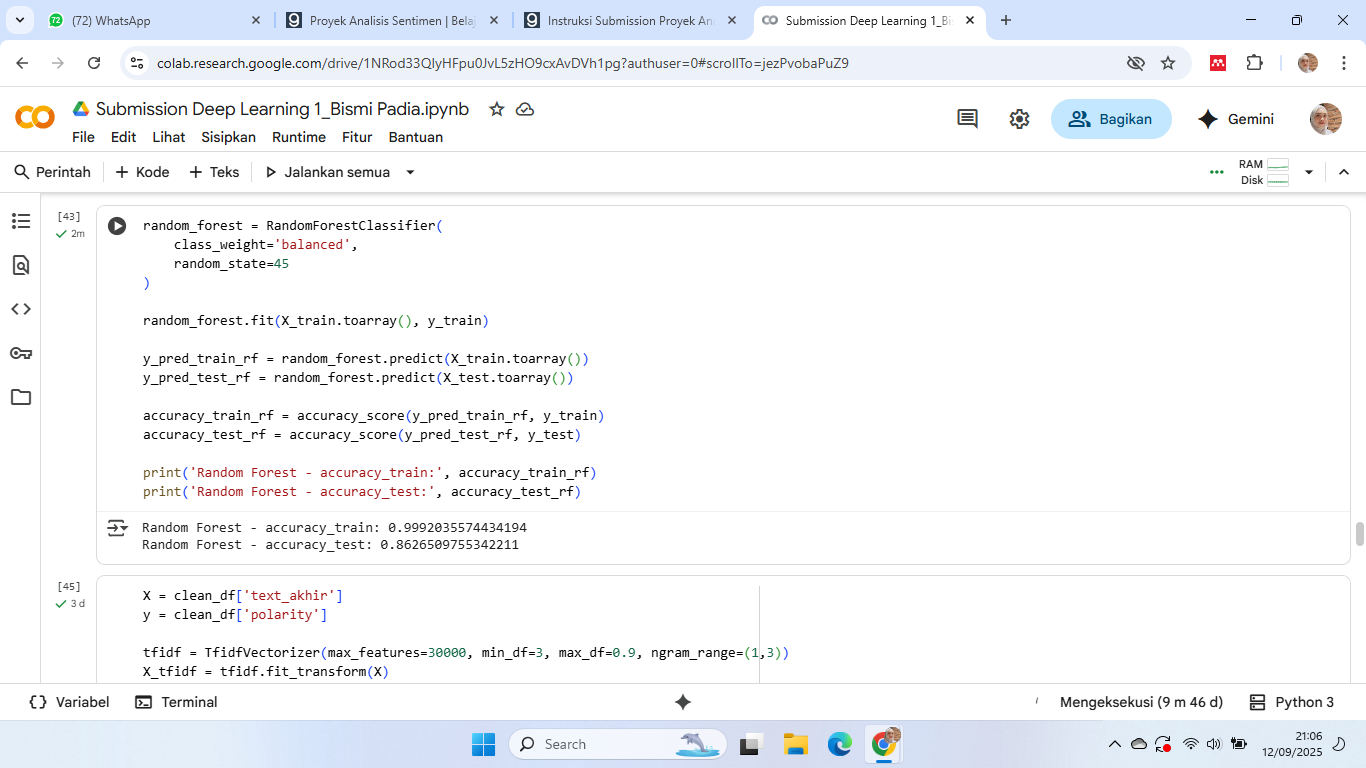

In [18]:
X = clean_df['text_akhir']
y = clean_df['polarity']

tfidf = TfidfVectorizer(max_features=40000, min_df=2, max_df=0.9, ngram_range=(1,3))
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=45)

In [19]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(
    LogisticRegression(class_weight='balanced', random_state=45, max_iter=5000),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

print("Best Params (LogReg):", grid_lr.best_params_)
print("Best CV Accuracy (LogReg):", grid_lr.best_score_)
print("Train Accuracy (LogReg):", grid_lr.best_estimator_.score(X_train, y_train))
print("Test Accuracy (LogReg):", grid_lr.best_estimator_.score(X_test, y_test))


Best Params (LogReg): {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Accuracy (LogReg): 0.9122851336879219
Train Accuracy (LogReg): 0.9985458352722196
Test Accuracy (LogReg): 0.9283554314956967


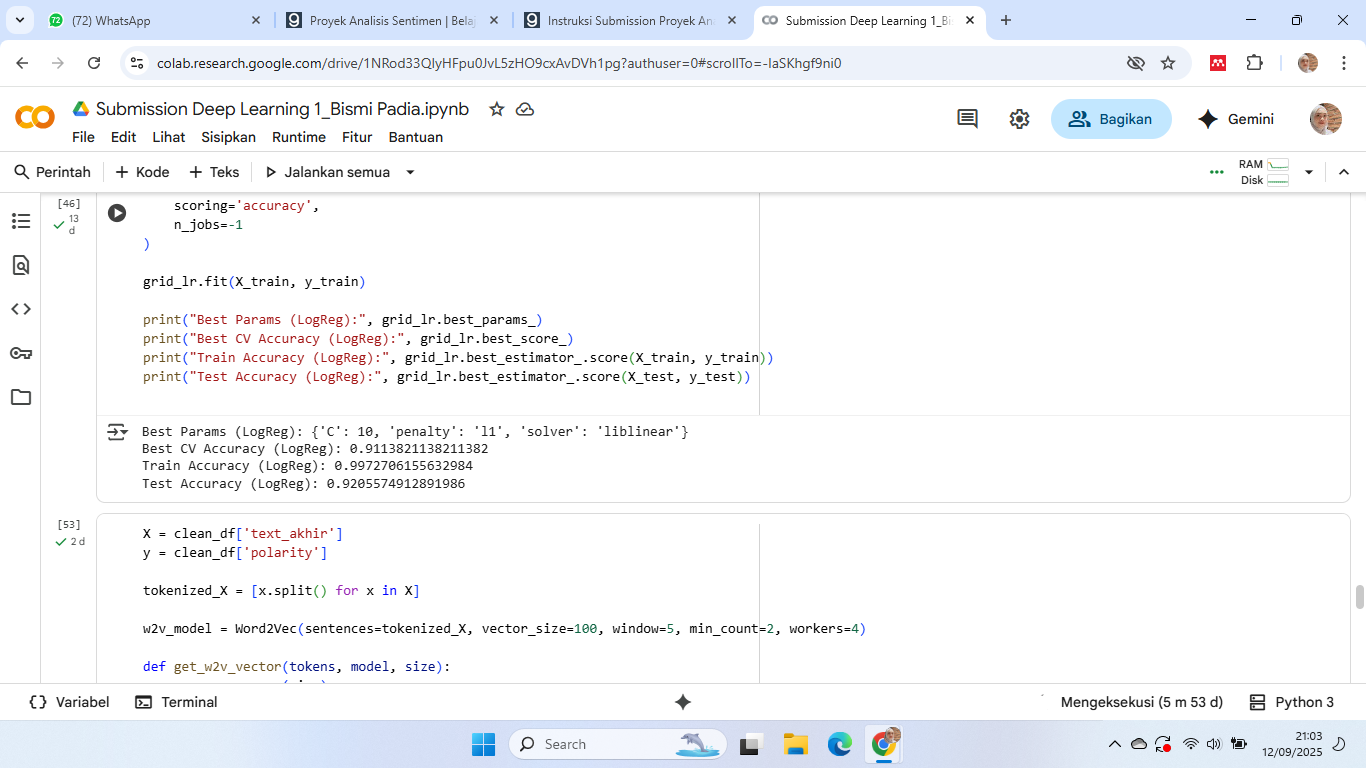

In [20]:
X = clean_df['text_akhir']
y = clean_df['polarity']

tfidf = TfidfVectorizer(max_features=30000, min_df=3, max_df=0.9, ngram_range=(1,3))
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=45)

In [ ]:
svm = LinearSVC(class_weight='balanced')
svm.fit(X_train, y_train)

print("SVM Train Accuracy:", svm.score(X_train, y_train))
print("SVM Test Accuracy:", svm.score(X_test, y_test))


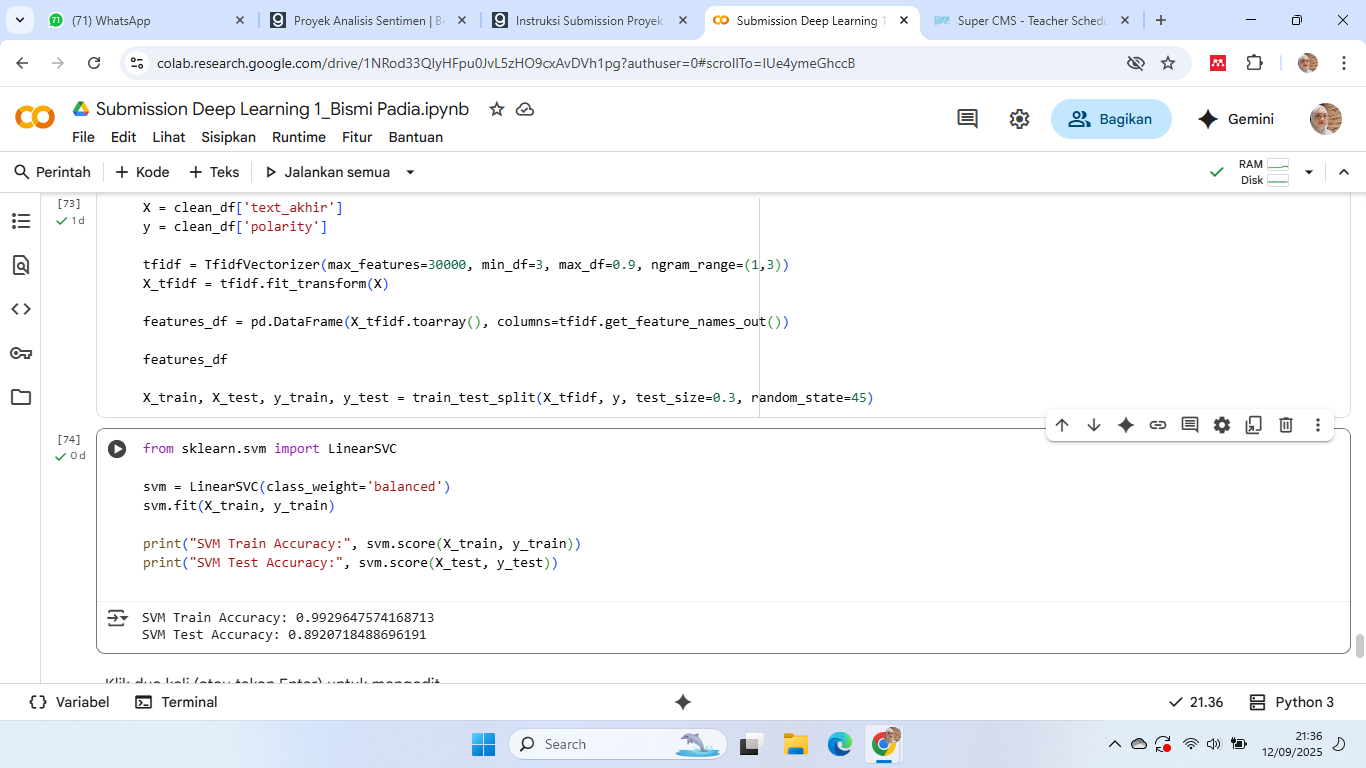

In [21]:
files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>